# Predict sleep efficiency based on Cecaj fitbit data
Sleep score based on Dr. Oz. 
    
    data source https://algo-data.quora.com/Data-sets-of-any-type-some-links 

In [386]:
######## config section ########
# specify input files
train_data_file = "OneYearFitBitDataSleepScore_train.csv"
test_data_file = "OneYearFitBitDataSleepScore_test.csv"


In [387]:
import pandas as pd
from IPython.display import display, HTML
from sklearn import tree

In [388]:
def main():
    train_data, test_data = data_import()
    train_features, train_labels, test_features = retrieve_features_and_labels(train_data, test_data)
    data_fit = perform_ML(train_features, train_labels, test_features)
    pred_labels_df = make_prediction(data_fit, test_features, test_data)
    plot_result(pred_labels_df)
    display(pred_labels_df)
    return 

In [389]:
#imports the data and shows the first rows
def data_import():
    train_data = pd.read_csv(train_data_file, sep = ',')
    train_data = train_data.dropna(axis=0,how="any")

    test_data = pd.read_csv(test_data_file , sep = ',')        
    test_data = test_data.dropna(axis=0,how="any")

    #display(train_data.head())
    #display(test_data)
   

    return train_data, test_data 
    #solve path problem https://dmorgan.info/posts/argparse-intro/ and delete files from the scripts folder

In [390]:
def retrieve_features_and_labels(train_data, test_data):
    
    # training data
    train_features = train_data.loc[:,['SleepScore']]
    train_labels = train_data.loc[:,['sleep_labels']]
    
    #test data
    test_features = test_data.loc[:,['SleepScore']]
    
    
    return train_features, train_labels, test_features

In [391]:
def perform_ML(train_features, train_labels, test_features):
    tree_classifier = tree.DecisionTreeClassifier() # create box for classification rules
    data_fit = tree_classifier.fit(train_features, train_labels) # find patterns to create box of rules 

    return data_fit

In [392]:
def make_prediction(data_fit, test_features, test_data):

    sleep_efficiency_pred = data_fit.predict(test_features)
    sleep_efficiency_pred = pd.DataFrame(sleep_efficiency_pred, columns=['pred_labels'], \
                                         index=list(range(0,(len(test_data)))))
    test_data.index = range(len(test_data))
    pred_labels_df = pd.concat([test_data, sleep_efficiency_pred], axis=1)
    
    return pred_labels_df

In [393]:
def plot_result(pred_labels_df):
    %matplotlib inline 
    pred_labels_plot = pred_labels_df[['Date', 'SleepScore', 'sleep_labels', 'pred_labels']].plot(x='Date')
    
    return

,Date,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,SleepScore,sleep_labels,pred_labels
0,01-07-2015,370,26,14,444,0.774775,2.0,2.0
1,02-07-2015,455,21,13,482,0.900415,0.0,0.0
2,03-07-2015,311,19,11,333,0.876877,1.0,1.0
3,04-07-2015,550,44,19,594,0.851852,1.0,1.0
4,05-07-2015,368,57,27,431,0.721578,3.0,3.0
5,06-07-2015,250,19,13,282,0.819149,2.0,2.0
6,07-07-2015,76,10,7,92,0.717391,3.0,3.0
7,08-07-2015,360,39,18,425,0.755294,2.0,2.0
8,09-07-2015,248,12,7,261,0.904215,0.0,0.0
9,10-07-2015,410,52,27,463,0.773218,2.0,2.0


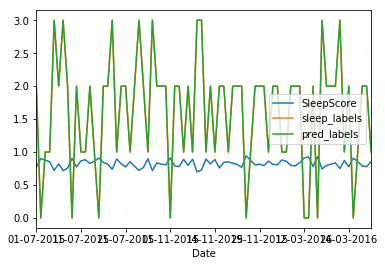

In [394]:
if __name__ == '__main__':
    main()